<a href="https://colab.research.google.com/github/Lane-Affield/Machine_Learning_Final/blob/main/Project2_LaneAffield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Lane Affield

Proposed Points (out of 25): 24/25 

**Problem** (1/1): I answered the questions about the data, explained the problem I am trying to solve, and stated what I am trying to predict

**Data** Prep(2/2): I checked to see if my data was null anywhere, created a train and test set, and normalized my data before using it. 

**Research**(9/10): I tried to find the best values for several paramters on each algorithm I tested. Included graphs when possible and kept things organized. The reason I docked myself a point was becasue I wanted to run PCA on my SVM but struggled at getting it to not show an error when I ran the tranformed training and test set. 

**analysis**(10/10): I discussed which algorithm worked best, which didn't, my findings for each algorithm. I talked about whcih parameters worked well and which didnt for increasing the accuracy of each model. 

**Bumps In the Road**(1/1): I descirbed several instances where I ran into trouble during this experiment. 


# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict.

Link to Dataset: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion?select=heart.csv

I got the dataset off of Kaggle. The data contains the follwoing columns: age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, and output. the Problem I will be trying to solve is to find the best algorithm to classify whether or not a person is at a high risk of heart attacks. The target variable for this experiment is going to be output, which states whether or not a person is at a high or low risk of a heart attack, where 1 = high risk and 0 = low risk.


# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

##Explanation / Summary

My first step in this process was selecting a dataset that had relevent columns as well as wasnt missing large null values, which I cam across often on Kaggle. The next step was checking if any of the datsets columns were null or served is unique identities and adjusting as necessary. There was no need to create dummies for htis dataset. Finally I created my train/test set and normalized the data. 

##Steps of cleaning process

 **Why Im sure that my data is clean:** there are no null values, any instances where I would need a dummy varable was already fixed in the dataset. I also normalized the data so no factors had values so high that they overshadowed other parts of the data. 


1. The first Step of my data prep process was finding a dataset that had both important columns and wasn't missing a massive amount of data or didnt ave data stored  as the incorrect data type , which I came across often on Kaggle while finding my dataset. While this wasn't part of me actually cleaning up the data I do think selecting my data was important to this process and should be noted. 

2. Import the data

In [ ]:
# load and prepare your data here
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data= pd.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/heart.csv')
data.head()

Mounted at /content/drive


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


3. Check for null values

In [ ]:
data.isna().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

4. create train/test set and normalize

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA

target = "output"
predictors = data.columns.drop(target) #gets all of the columns except the target

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=34)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)


#3. Research
Put your code and your experiments here.

My plan is to take multiple algorithms and maximize their accuracy by seeing what the best values for certain parameters are


 ## **Random** **Forests**


### 1. finding the baseline accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
forest = RandomForestClassifier() 
forest.fit(train_data_normalized,train_sln)
predictions = forest.predict(test_data_normalized)
print("RANDOM FOREST accuracy score: ", metrics.accuracy_score(test_sln,predictions))

RANDOM FOREST accuracy score:  0.8852459016393442


###2. seeing which features are the most important

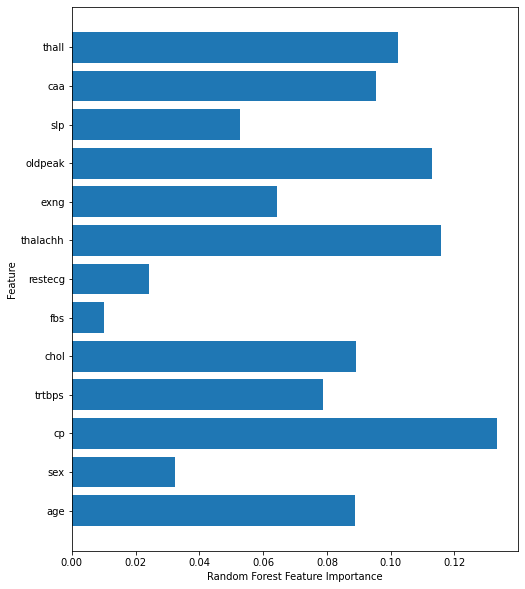

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics 

from sklearn import tree

# It looks like our random forest model achieved pretty good accuracy. 
# Now lets check how important each of the features was in the ensemble of models we built.

import matplotlib.pyplot as plt
%matplotlib inline
forest = RandomForestClassifier(random_state = 0, n_estimators=100)
forest.fit(train_data,train_sln)
predictions = forest.predict(test_data)
index = range(len(predictors)) #creates a list of numbers the right size to use as the index

plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.barh(index,forest.feature_importances_,height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.show()

     

### 3. finding the optimal number of trees

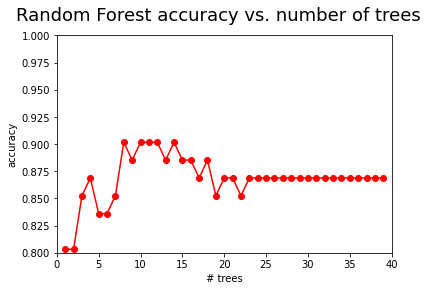

In [ ]:
def tune_number_of_trees(n_estimator_values):
    rf_accuracies = []

    for n in n_estimator_values:

        curr_rf = RandomForestClassifier(n_estimators=n, random_state=41)
        curr_rf.fit(train_data_normalized,train_sln)
        curr_predictions = curr_rf.predict(test_data_normalized)
        curr_accuracy = metrics.accuracy_score(test_sln,curr_predictions)
        rf_accuracies.append(curr_accuracy)


    plt.suptitle('Random Forest accuracy vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,rf_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.8,1])

    plt.show()
    
tune_number_of_trees(range(1,40))


###4. Finding the optimal random_state

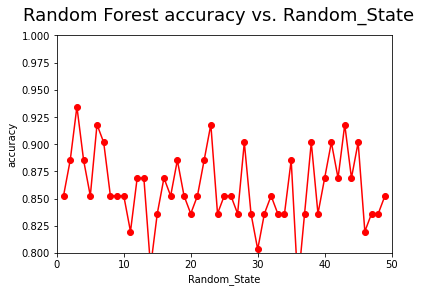

In [ ]:
def tune_random_state(n_estimator_values):
    rf_accuracies = []

    for n in n_estimator_values:

        curr_rf = RandomForestClassifier(n_estimators=11, random_state=n)
        curr_rf.fit(train_data_normalized,train_sln)
        curr_predictions = curr_rf.predict(test_data_normalized)
        curr_accuracy = metrics.accuracy_score(test_sln,curr_predictions)
        rf_accuracies.append(curr_accuracy)


    plt.suptitle('Random Forest accuracy vs. Random_State',fontsize=18)
    plt.xlabel('Random_State')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,rf_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.8,1])

    plt.show()
    
tune_random_state(range(1,50))

### 5. Creating the best RF algorithm given these two factors

In [ ]:
forest = RandomForestClassifier(random_state= 3, n_estimators= 8) 
forest.fit(train_data_normalized,train_sln)
predictions = forest.predict(test_data_normalized)
print("RANDOM FOREST accuracy score: ", metrics.accuracy_score(test_sln,predictions))




RANDOM FOREST accuracy score:  0.9344262295081968


FINDINGS
- The optimal RandomForestClassifier for this dataset has a random state of 3 and 8 trees. This resulted in an accuracy of .9344
- The random state did its best towards the biginning of the training set
- #of trees is best at 8, 10, 11, 12 or 14. levels out at 24 

##**SVC**

###1.  finding Baseline accuracy for the algorithm

In [ ]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(train_data_normalized,train_sln)
predictions = clf.predict(test_data_normalized)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))


accuracy: 0.8688524590163934


###2. Kernel Tests

> linear kernel 

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel = "linear")
clf.fit(train_data_normalized,train_sln)
predictions = clf.predict(test_data_normalized)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))

accuracy: 0.8688524590163934


> rbf (default) 

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel = "rbf")
clf.fit(train_data_normalized,train_sln)
predictions = clf.predict(test_data_normalized)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))

accuracy: 0.8688524590163934


> poly

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel = 'poly')
clf.fit(train_data_normalized,train_sln)
predictions = clf.predict(test_data_normalized)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))

accuracy: 0.8688524590163934


###3. Finding optimal C

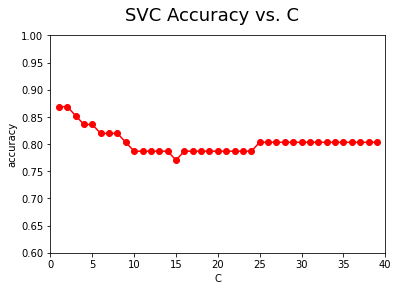

In [ ]:
def optimal_c(n_estimator_values):
    rf_accuracies = []
    
    for n in n_estimator_values:
        if n == 0: 
            n = 1
        curr_rf = SVC(C = n)
        curr_rf.fit(train_data_normalized,train_sln)
        curr_predictions = curr_rf.predict(test_data_normalized)
        curr_accuracy = metrics.accuracy_score(test_sln,curr_predictions)
        rf_accuracies.append(curr_accuracy)


    plt.suptitle('SVC Accuracy vs. C',fontsize=18)
    plt.xlabel('C')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,rf_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.6,1])

    plt.show()
    
optimal_c(range(1,40))

###4.  Optimal Gamma

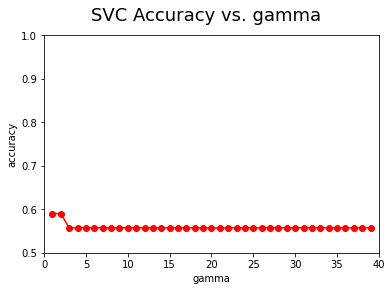

In [ ]:
def optimal_gamma(n_estimator_values):
    rf_accuracies = []
    
    for n in n_estimator_values:
        if n == 0: 
            n = 1
        curr_rf = SVC(gamma = n)
        curr_rf.fit(train_data_normalized,train_sln)
        curr_predictions = curr_rf.predict(test_data_normalized)
        curr_accuracy = metrics.accuracy_score(test_sln,curr_predictions)
        rf_accuracies.append(curr_accuracy)


    plt.suptitle('SVC Accuracy vs. gamma',fontsize=18)
    plt.xlabel('gamma')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,rf_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.5,1])

    plt.show()
    
optimal_gamma(range(1,40))

### Making the Best SVC given the optimal perameters

In [ ]:
clf = SVC()
clf.fit(train_data_normalized,train_sln)
predictions = clf.predict(test_data_normalized)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))

accuracy: 0.8688524590163934


> Findings:
- SVC works best at the baseline (.8689 accuracy) 
- Kernel has no effect
- Gamma and C only hurt the accuracy

## **Perceptron** 

###1. Perceptron Baseline

In [ ]:
from sklearn.linear_model import Perceptron

import warnings
warnings.filterwarnings("ignore")

perc = Perceptron()
perc.fit(train_data_normalized,train_sln)
predictions = perc.predict(test_data_normalized)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))

accuracy: 0.9016393442622951


### 2. Optimal Random State

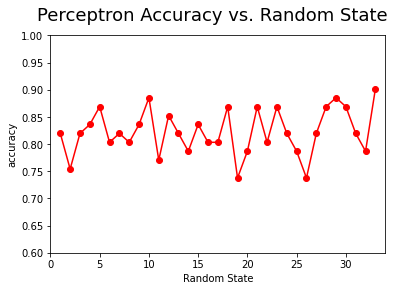

In [ ]:
def optimal_ra(n_estimator_values):
    rf_accuracies = []
    
    for n in n_estimator_values:
        if n == 0: 
            n = 1
        curr_rf = Perceptron(random_state = n)
        curr_rf.fit(train_data_normalized,train_sln)
        curr_predictions = curr_rf.predict(test_data_normalized)
        curr_accuracy = metrics.accuracy_score(test_sln,curr_predictions)
        rf_accuracies.append(curr_accuracy)


    plt.suptitle('Perceptron Accuracy vs. Random State',fontsize=18)
    plt.xlabel('Random State')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,rf_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.6,1])

    plt.show()
    
optimal_ra(range(1,34))

###3.  Optimal Max iter 

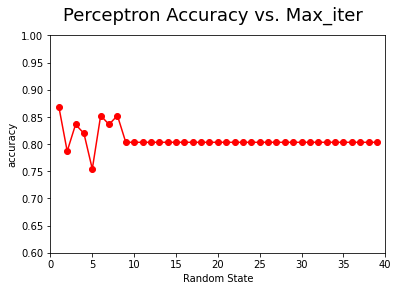

In [ ]:
def optimal_ra(n_estimator_values):
    rf_accuracies = []
    
    for n in n_estimator_values:
        if n == 0: 
            n = 1
        curr_rf = Perceptron(random_state = 34 , max_iter = n)
        curr_rf.fit(train_data_normalized,train_sln)
        curr_predictions = curr_rf.predict(test_data_normalized)
        curr_accuracy = metrics.accuracy_score(test_sln,curr_predictions)
        rf_accuracies.append(curr_accuracy)


    plt.suptitle('Perceptron Accuracy vs. Max_iter',fontsize=18)
    plt.xlabel('Random State')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,rf_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.6,1])

    plt.show()
    
optimal_ra(range(1,40))

### 4. Best Perceptron


In [ ]:
from sklearn.linear_model import Perceptron

import warnings
warnings.filterwarnings("ignore")

perc = Perceptron()
perc.fit(train_data_normalized,train_sln)
redictions = perc.predict(test_data_normalized)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln,predictions))

accuracy: 0.9016393442622951


> Findings 
  - the best highest accuracy I found was the baseline
  - I tried messing around with other parameters but they either did nothing to the function or decreased the accuracy. 



##**SGD**

### 1. baseline SGD accuracy

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state = 0)
sgd.fit(train_data_normalized,train_sln)
sgd_predictions = sgd.predict(test_data_normalized)

print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))


accuracy: 0.7704918032786885


### 2. Penalty 

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier( random_state = 0,  penalty = "l1")
sgd.fit(train_data_normalized,train_sln)
sgd_predictions = sgd.predict(test_data_normalized)

print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))


accuracy: 0.8688524590163934


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier( random_state = 0,  penalty = "elasticnet")
sgd.fit(train_data_normalized,train_sln)
sgd_predictions = sgd.predict(test_data_normalized)

print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))

accuracy: 0.8524590163934426


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier( random_state = 0,  penalty = "None")
sgd.fit(train_data_normalized,train_sln)
sgd_predictions = sgd.predict(test_data_normalized)

print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))

accuracy: 0.8360655737704918


###3. Loss  


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier( random_state = 0,  penalty = "l1", loss = "hinge")
sgd.fit(train_data_normalized,train_sln)
sgd_predictions = sgd.predict(test_data_normalized)

print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))

accuracy: 0.8688524590163934


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier( random_state = 0,  penalty = "l1", loss = "log")
sgd.fit(train_data_normalized,train_sln)
sgd_predictions = sgd.predict(test_data_normalized)

print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))

accuracy: 0.9016393442622951


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier( random_state = 0,  penalty = "l1", loss = "modified_huber")
sgd.fit(train_data_normalized,train_sln)
sgd_predictions = sgd.predict(test_data_normalized)

print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))

accuracy: 0.8852459016393442


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier( random_state = 0,  penalty = "l1", loss = "squared_hinge") 
sgd.fit(train_data_normalized,train_sln)
sgd_predictions = sgd.predict(test_data_normalized)

print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))

accuracy: 0.8032786885245902


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier( random_state = 0,  penalty = "l1", loss = "perceptron") 
sgd.fit(train_data_normalized,train_sln)
sgd_predictions = sgd.predict(test_data_normalized)

print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))

accuracy: 0.7704918032786885


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier( random_state = 0,  penalty = "l1", loss = "huber") 
sgd.fit(train_data_normalized,train_sln)
sgd_predictions = sgd.predict(test_data_normalized)

print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))

accuracy: 0.8360655737704918


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier( random_state = 0,  penalty = "l1", loss = "epsilon_insensitive") 
sgd.fit(train_data_normalized,train_sln)
sgd_predictions = sgd.predict(test_data_normalized)

print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))

accuracy: 0.6065573770491803


### 4. Learning Rate

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier( random_state = 0,  penalty = "l1", loss = "log", learning_rate = "constant", eta0 = .5)
sgd.fit(train_data_normalized,train_sln)
sgd_predictions = sgd.predict(test_data_normalized)

print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))

accuracy: 0.9180327868852459


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier( random_state = 0,  penalty = "l1", loss = "log", learning_rate = "invscaling", eta0 = .5)
sgd.fit(train_data_normalized,train_sln)
sgd_predictions = sgd.predict(test_data_normalized)

print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))

accuracy: 0.8524590163934426


In [ ]:
sgd = SGDClassifier( random_state = 0,  penalty = "l1", loss = "log", learning_rate = "adaptive", eta0 = .5)
sgd.fit(train_data_normalized,train_sln)
sgd_predictions = sgd.predict(test_data_normalized)

print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))

accuracy: 0.8524590163934426


### 5. Optimal Max iter

- Wasn't able to make a graph work for this. my error read that sgd couldn't be called inside of the function 

In [ ]:
sgd = SGDClassifier( random_state = 0,  penalty = "l1", loss = "log", learning_rate = "constant", eta0 = .5, max_iter = 7)
sgd.fit(train_data_normalized,train_sln)
sgd_predictions = sgd.predict(test_data_normalized)

print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))

accuracy: 0.9180327868852459


###6. Best SGD

In [ ]:
sgd = SGDClassifier( random_state = 0,  penalty = "l1", loss = "log", learning_rate = "constant", eta0 = .5, max_iter = 7)
sgd.fit(train_data_normalized,train_sln)
sgd_predictions = sgd.predict(test_data_normalized)

print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))

accuracy: 0.9180327868852459


> findings 
- the best SGD had penalty = l1 loss = log, learning_rate = constant( with eta0 = .5) and an accuracy of .9180
- max_iter leveled out at about 7 

##**MLP**

###1. MLP baseline accuracy

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mlp = MLPClassifier(random_state = 0 )
mlp.fit(train_data_normalized,train_sln)
predictions = mlp.predict(test_data_normalized)

print("MLP accuracy:", metrics.accuracy_score(test_sln, predictions))

MLP accuracy: 0.9016393442622951


### 2. Solver

was not able to create graphs for mlp, error said mlp wasn't callable in the function to make a graph

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mlp = MLPClassifier(random_state = 0, solver = 'lbfgs' )
mlp.fit(train_data_normalized,train_sln)
predictions = mlp.predict(test_data_normalized)

print("MLP accuracy:", metrics.accuracy_score(test_sln, predictions))

MLP accuracy: 0.8360655737704918


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mlp = MLPClassifier(random_state = 0, solver = 'sgd' )
mlp.fit(train_data_normalized,train_sln)
predictions = mlp.predict(test_data_normalized)

print("MLP accuracy:", metrics.accuracy_score(test_sln, predictions))

MLP accuracy: 0.8852459016393442


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mlp = MLPClassifier(random_state = 0, solver = 'sgd' )
mlp.fit(train_data_normalized,train_sln)
predictions = mlp.predict(test_data_normalized)

print("MLP accuracy:", metrics.accuracy_score(test_sln, predictions))

MLP accuracy: 0.8852459016393442


###3. learning rate

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mlp = MLPClassifier(random_state = 0, learning_rate = "constant", solver = 'sgd')
mlp.fit(train_data_normalized,train_sln)
predictions = mlp.predict(test_data_normalized)

print("MLP accuracy  :", metrics.accuracy_score(test_sln, predictions))

MLP accuracy  : 0.8852459016393442


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mlp = MLPClassifier(random_state = 0, learning_rate = "invscaling", solver = 'sgd')
mlp.fit(train_data_normalized,train_sln)
predictions = mlp.predict(test_data_normalized)

print("MLP accuracy :", metrics.accuracy_score(test_sln, predictions))

MLP accuracy : 0.3442622950819672


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mlp = MLPClassifier(random_state = 0, learning_rate = "adaptive", solver = 'sgd')
mlp.fit(train_data_normalized,train_sln)
predictions = mlp.predict(test_data_normalized)

print("MLP accuracy:", metrics.accuracy_score(test_sln, predictions))

MLP accuracy: 0.8852459016393442


### 4. Alpha

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mlp = MLPClassifier(random_state = 0, alpha = .01)
mlp.fit(train_data_normalized,train_sln)
predictions = mlp.predict(test_data_normalized)

print("MLP accuracy: ", metrics.accuracy_score(test_sln, predictions))

MLP Regression R2: 0.9016393442622951


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mlp = MLPClassifier(random_state = 0, alpha = 1)
mlp.fit(train_data_normalized,train_sln)
predictions = mlp.predict(test_data_normalized)

print("MLP accuracy: ", metrics.accuracy_score(test_sln, predictions))

MLP Regression R2: 0.8688524590163934


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mlp = MLPClassifier(random_state = 0, alpha = 10)
mlp.fit(train_data_normalized,train_sln)
predictions = mlp.predict(test_data_normalized)

print("MLP accuracy: ", metrics.accuracy_score(test_sln, predictions))

MLP Regression R2: 0.8524590163934426


### 5. Best MLP 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mlp = MLPClassifier(random_state = 0 )
mlp.fit(train_data_normalized,train_sln)
predictions = mlp.predict(test_data_normalized)

print("MLP Accuracy:", metrics.accuracy_score(test_sln, predictions))

MLP Accuracy: 0.9016393442622951


> Findings 
- THe best MLP was the baseline from scikit learn with an accuracy of .9016
- modifying alpha either hurt or had no effect on algorithm 
- learning rate only lowered accuracy 
- Solver also only lowered accuracy

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

I Discovered That the best algorithm for this dataset was a Random Forest agorithm, however I would not have known that if I just ran the basic function for each of these and then tuned the best algorithm. The best RF I came up with had a random_state of 3 and the # of estimators set to 8. I was surprised by this because my gut intuition with this dataset was that it would be easily seperable and would work best with somethign like an SVC, but that was not the case.

The worst algorithm was the SVC, which I thought would be the best, I'm assuming that the reason SVC performed so poorly is that the data isn't easily seperated. This was also a problem I remembered SVMs having in assignment 05 as well. I also noticed that changing C and the Gamma of the algorithm had no influence on the accuracy. 

I was able to increase the accuracy of my SGD, but not enough to out perform my tuned random forest algorithm. I found that by using the following parameters I was able to increase the accuracy:  random_state = 0,  penalty = "l1", loss = "log", learning_rate = "constant", eta0 = .5, max_iter = 7 . 

Both the Perceptron and the MLP worked ok, but changing parameters also only lowered their accuracy, like the SVC. 

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

I came across several Bumps in my experiment. The First challenge I had was in picking a dataset. When I got on Kaggle I originally wanted to do an algorithm that classified coffee beans, but every one I found had huge amounts of null rows. Then I found an Amazon Dataset that didn't have any null values and when I looked at the CSV file everything seemed to be relevant and nothing was alarming, but when I started using it in my project I found out that the columns with numeric values were stores as strings, not a numeric datatype. So I had to reasses and came across this heart attack analysis dataset. 

The Second issue I came across was creating graphs for the last couple algorithms' parameters to see which value was the best. Both MLP and SGD wouldn't let me, and I received an error that they weren't callable. To work around this, I tried editing the graphing function, but it still wouldnt work so I had to give up on using these and create cells with different values for the parameter I was testing. 

Another Issue I cam across was with the graphs again. When I tried using some prameters I would get an error that said something couldnt be less that 1. so to fix this I added an if statement that would set the the current parameter  for the for loop to 1 if the value it was on happened to be 0 it woudlnt throw an error. 